# Senza dual ring con il primo scattering foil, fascio da 70 mev desritto con i parametri di courant snyder, con uscita del collimatore a 5 cm dal fantoccio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as cl
import glob
import os
from io import StringIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import curve_fit 
import csv


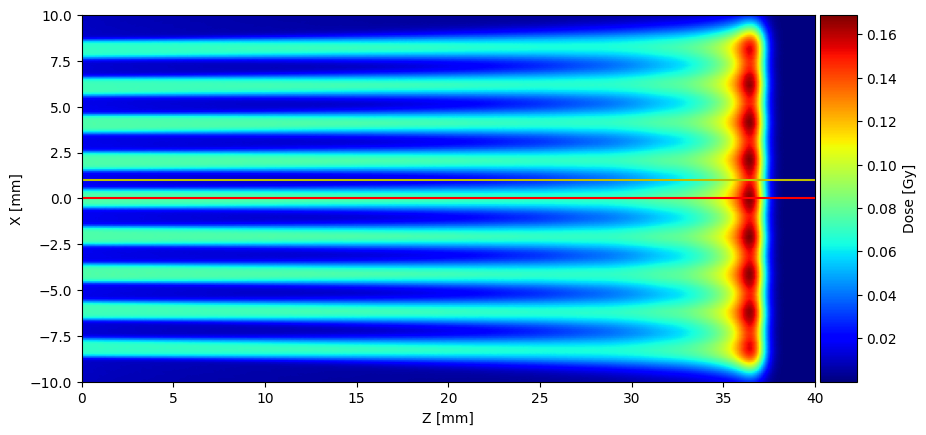

In [2]:
all_files = glob.glob(os.path.join("results_lead/dose_cut*"))

df_dose = pd.DataFrame()

df_dose = pd.concat((pd.read_csv(f, skiprows=8 , header=None, dtype = 'float32') for f in all_files), ignore_index=True)

#df_dose.columns = ['x','y', 'z', 'dose']

dist = np.reshape(df_dose[3], (len(all_files),200,500))

#sheet = np.average(dist, axis = 0)
sheet = dist.sum(axis = 0)
dose = np.fliplr(sheet)

#dose = np.fliplr(sheet)

plt.figure(figsize=(10,5))
ax = plt.gca()
im = plt.imshow(dose,extent=[0,50,-10,10], cmap='jet' ) #, cmap=plt.cm.jet
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=1, color='y', linestyle='-')
plt.xlabel("Z [mm]")
plt.ylabel("X [mm]")
plt.xlim(0,40)
# plt.ylim(0,2)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax, label = "Dose [Gy]")
plt.savefig("images/dose_pvdr_lines.png")
plt.show()



/home/mbett/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


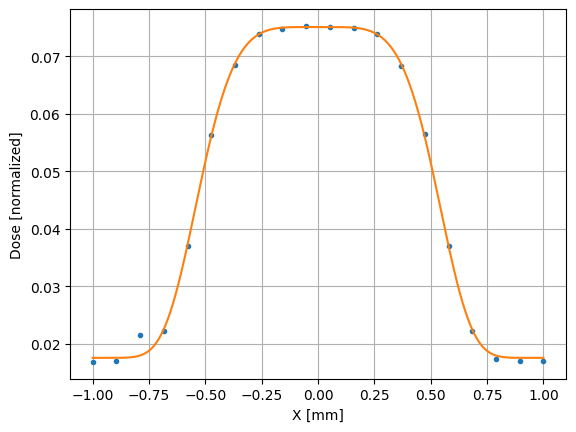

In [3]:
def gauss_higher(x, off, A, mu, sigma, order): 
    return off + A * np.exp(-((x - mu) ** 2 / (2 * sigma ** 2))**order) #+ A1 * np.exp(-((x - mu1) ** 2 / (2 * sigma1 ** 2))**order1)

def gauss(x, off, A, mu, sigma, order): 
    return off + A * np.exp(-((x - mu) ** 2 / (2 * sigma ** 2))**order)

nf = int(10)


fl = int(390)
pace = int(3)

x_fit = np.linspace(-1,1,2*nf)
pvdr_fit = []
pvdr_data = []
p_dose_fit = []
p_valley_fit = []

params = []

# p0 = [0, 0.005, 0, 0.5, 1.5, 0.001, 0, 0.2, 1]

p0 = [0, 0.05, 0, 0.5, 1.5]

for i in range(0,fl,pace):
    data = dose[:,i]
    y_fit = data[100-nf:100+nf]
    pvdr_data.append(np.max(data)/np.min(data))
    p_fit, p_cov = curve_fit(gauss_higher, x_fit, y_fit, maxfev=1000000) #/np.max(y_fit)
    p0 = p_fit
    params.append(p_fit)
    x_cont = np.linspace(-1,1,10000)
    fit = gauss_higher(x_cont, *p_fit)
    p_dose_fit.append(max(fit))
    p_valley_fit.append(min(fit))
    pvdr_fit.append(np.max(fit)/np.min(fit))
    if i == 0:
        plt.plot(x_fit, y_fit,'.', label = 'data')
        plt.plot(x_cont, fit, label='fit')
        #plt.legend()
        plt.xlabel("X [mm]")
        plt.ylabel("Dose [normalized]")
        #plt.xlim(-2.5,2.5)

    # if i < 10:
    #     plt.plot(x_fit, y_fit,'.k')
    #     #plt.plot(x_cont, fit, 'k',label='fit')
    #     #plt.xlim(-2.5,2.5)
plt.grid()
#plt.legend()
# plt.savefig("images/dose_fit_higher.png")
plt.show()

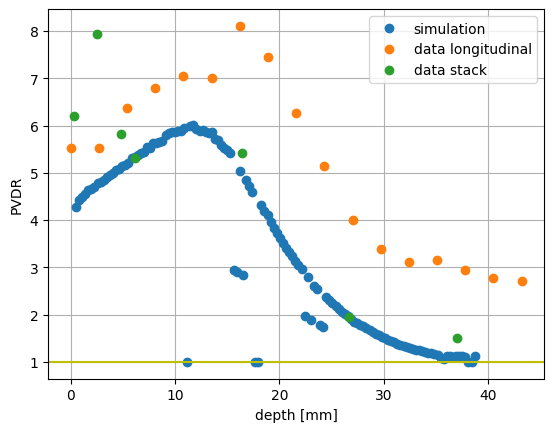

1.0


In [4]:
z_pvdr = np.linspace(0 + 0.5,(len(pvdr_fit)*pace-pace)/500 * 50, len(pvdr_fit))

x_pvdr = [0.0, 2.6998124999999997, 5.3996249999999995, 8.099437499999999, 10.799249999999999, 13.499062499999999, 16.198874999999997, 18.898687499999998, 21.598499999999998, 24.298312499999998, 26.998124999999998, 29.6979375, 32.397749999999995, 35.097562499999995, 37.797374999999995, 40.497187499999995, 43.196999999999996]
exp = [5.523612473597857, 5.51846884363868, 6.360171265885559, 6.791752524177126, 7.047486267853473, 7.005254201327686, 8.106683605988225, 7.452991533974611, 6.263042262910215, 5.134664575104403, 4.011542328895996, 3.3979548491610085, 3.11346065596944, 3.156761548722803, 2.9514575282316935, 2.765796300072156, 2.717491702230624]

x_pvdr_2 = np.array([0.28 ,2.56, 4.84, 6.12, 16.4, 26.68, 36.96])
data_exp = [6.198616193140037, 7.94206192366742, 5.824586186312795, 5.313471464926459, 5.414347566815265, 1.9419267240354916, 1.5]


plt.plot(z_pvdr,pvdr_fit,'o', label = 'simulation')
plt.plot(x_pvdr,exp,'o', label = 'data longitudinal')
plt.plot(x_pvdr_2,data_exp,'o', label = 'data stack')
plt.grid()
# plt.title('PVDR')
plt.axhline(1,color = 'y')
plt.ylabel('PVDR')
plt.legend()
plt.xlabel('depth [mm]')
plt.savefig('images/pvdr_higher_conf.png')
# plt.xlim(-2,200)
# plt.ylim(-1,5)
plt.show()
print(min(pvdr_fit))

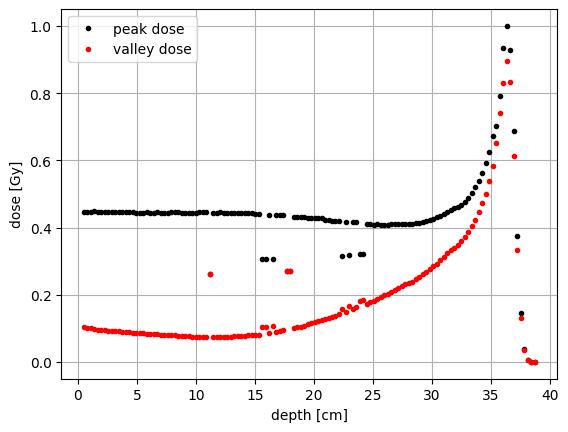

In [5]:
plt.plot(z_pvdr, p_dose_fit/np.max(p_dose_fit),'.k')
plt.plot(z_pvdr, p_valley_fit/np.max(p_dose_fit),'.r')
plt.xlabel('depth [cm]')
plt.ylabel('dose [Gy]')
plt.legend(['peak dose ','valley dose'])
plt.grid()

plt.savefig('images/dose_lo.png')
plt.show()

In [6]:
dose_in = p_dose_fit[0]

n_part = 1/dose_in * 1e8 *len(all_files)

c_max = 320 * 3.8e6

print('time = ', n_part/c_max, 'seconds')

time =  94.22358325573869 seconds


# Multiple gaussian fit

In [7]:
def multi_gauss_higher(x, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, off,order):
    gauss1 = A1 * np.exp(-((x - mu1) ** 2 / (2 * sigma1 ** 2))**order)
    gauss2 = A2 * np.exp(-((x - mu2) ** 2 / (2 * sigma2 ** 2))**order)
    gauss3 = A3 * np.exp(-((x - mu3) ** 2 / (2 * sigma3 ** 2))**order)
    return off + gauss1 + gauss2 + gauss3 

In [8]:
def gaussian_3(x, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, off):
    gauss1 = A1 * np.exp(-((x - mu1) ** 2 / (2 * sigma1 ** 2)))
    gauss2 = A2 * np.exp(-((x - mu2) ** 2 / (2 * sigma2 ** 2)))
    gauss3 = A3 * np.exp(-((x - mu3) ** 2 / (2 * sigma3 ** 2)))
    return off + gauss1 + gauss2 + gauss3

In [9]:
import numpy as np

def multi_gauss_9_higher(x, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, A4, mu4, sigma4, A5, mu5, sigma5, A6, mu6, sigma6, A7, mu7, sigma7, A8, mu8, sigma8, A9, mu9, sigma9, off, off2,order):
    """
    Calculate the sum of 9 Gaussians at the given x values.
    
    Parameters:
    - x: array-like, the x values at which to evaluate the function
    - params: array-like, the parameters of the Gaussians (mean, standard deviation, and amplitude)
    
    Returns:
    - y: array-like, the y values of the sum of 9 Gaussians at the given x values
    """
    gauss1 = A1 * np.exp(-((x - mu1) ** 2 / (2 * sigma1 ** 2))**order)
    gauss2 = A2 * np.exp(-((x - mu2) ** 2 / (2 * sigma2 ** 2))**order)
    gauss3 = A3 * np.exp(-((x - mu3) ** 2 / (2 * sigma3 ** 2))**order)
    gauss4 = A4 * np.exp(-((x - mu4) ** 2 / (2 * sigma4 ** 2))**order)
    gauss5 = A5 * np.exp(-((x - mu5) ** 2 / (2 * sigma5 ** 2))**order)
    gauss6 = A6 * np.exp(-((x - mu6) ** 2 / (2 * sigma6 ** 2))**order)
    gauss7 = A7 * np.exp(-((x - mu7) ** 2 / (2 * sigma7 ** 2))**order)
    gauss8 = A8 * np.exp(-((x - mu8) ** 2 / (2 * sigma8 ** 2))**order)
    gauss9 = A9 * np.exp(-((x - mu9) ** 2 / (2 * sigma9 ** 2))**order)

    return gauss1 + gauss2 + gauss3 + gauss4 + gauss5 + gauss6 + gauss7 + gauss8 + gauss9 + off + off2*x**2


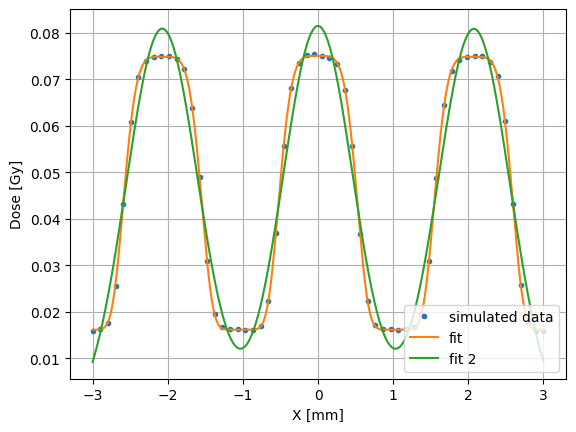

In [20]:
nf = int(30)
fl = int(380)
pace = int(10)

x_min = - nf*0.1
x_max = + nf*0.1

x_fit = np.linspace(x_min,x_max,2*nf)
pvdr_fit_multi = []
p_dose_fit_multi = []
p_valley_fit_multi = []

p0=[0.01, -2.1, 0.5, 0.01, 0, 0.5, 0.01, 2.1, 0.5, 0, 1.5]

for i in range(2,fl,pace):
    data = dose[:,i]
    y_fit = data[100-nf:100+nf]
    p_fit, p_cov = curve_fit(multi_gauss_higher, x_fit, y_fit, p0 = p0)
    p_fit_2, p_cov_2 = curve_fit(gaussian_3, x_fit, y_fit, p0 = p0[:10])
    p0 = p_fit
    x_cont = np.linspace(x_min,x_max,20000)
    fit = multi_gauss_higher(x_cont, *p_fit)
    fit_2 = gaussian_3(x_cont, *p_fit_2)
    p_dose_fit_multi.append(max(fit))
    p_valley_fit_multi.append(min(fit))
    pvdr_fit_multi.append(np.max(fit[3000:17000])/np.min(fit[3000:17000]))
    if i == 12:
        plt.plot(x_fit, y_fit,'.', label='simulated data')
        plt.plot(x_cont, fit, label='fit')
        plt.plot(x_cont, fit_2, label='fit 2')
        #plt.xlim(-2.5,2.5)

    # if i < 10:
    #     plt.plot(x_fit, y_fit,'.k')
    #     #plt.plot(x_cont, fit, 'k',label='fit')
    #     #plt.xlim(-2.5,2.5)
plt.grid()
plt.legend(loc = 'lower right')
plt.xlabel("X [mm]")
plt.ylabel("Dose [Gy]")
plt.savefig("images/dose_fit_multi_3_higher_fits.png")
plt.show()

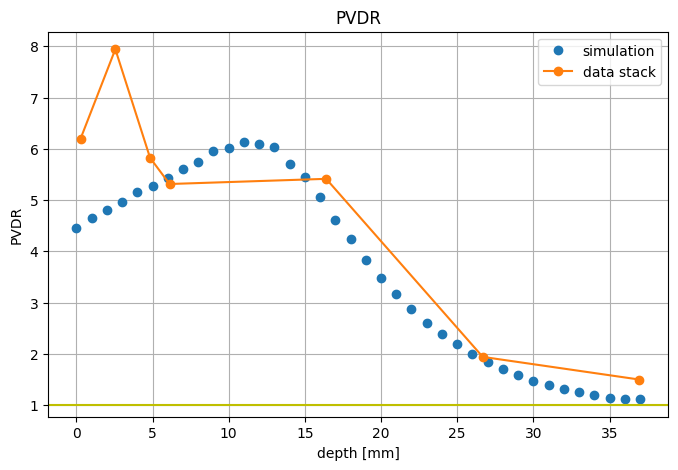

1.1164501952836694


In [ ]:
z_pvdr = np.linspace(0,(len(pvdr_fit_multi)*pace-pace)/500 * 50, len(pvdr_fit_multi))

# z2 = [0.0, 1.0416666666666667, 2.0833333333333335, 3.125, 4.166666666666667, 5.208333333333334, 6.25, 7.291666666666667, 8.333333333333334, 9.375, 10.416666666666668, 11.458333333333334, 12.5, 13.541666666666668, 14.583333333333334, 15.625000000000002, 16.666666666666668, 17.708333333333336, 18.75, 19.791666666666668, 20.833333333333336, 21.875, 22.916666666666668, 23.958333333333336, 25.0]
# pvdr2 = [7.549747378681612, 7.322421524582645, 7.147228385462072, 6.991703508125974, 6.848877988055605, 6.691363649365228, 6.439995828213933, 6.214162419177839, 5.963917219854882, 5.67341162845863, 5.332834576023263, 5.0004234636505975, 4.61735878399866, 4.263117505771262, 3.8665333894576834, 3.537650531362961, 3.178291475263978, 2.878849815476682, 2.589484624149156, 2.3111889786470776, 2.1013469885463856, 1.9121938152701312, 1.7353714878280864, 1.6350563277721355, 1.611675949364082]

# x_pvdr = np.array([0.28 ,2.56, 4.84, 6.12, 16.4, 26.68, 36.96])
# pvdr_data = [3.6931637805427013, 4.474107690705064, 3.0531847586622827, 4.017341640612047, 3.2859538415559566, 1.6715627492982714, 1.1499170909571363]

plt.figure(figsize=(8,5))
plt.plot(z_pvdr,pvdr_fit_multi,'o', label = 'simulation')
# plt.plot(x_pvdr,exp,'-o', label = 'data longitudinal')
plt.plot(x_pvdr_2,data_exp,'-o', label = 'data stack')

# plt.plot(x_pvdr, pvdr_data, 'o', label = 'data')
# plt.plot(z2,pvdr2,'o', color = 'tab:orange', label = 'fit')
plt.grid()
plt.title('PVDR')
plt.axhline(1,color = 'y')
# plt.ylabel('PVDR')
plt.xlabel('depth [mm]')
plt.legend()
plt.ylabel('PVDR')
plt.savefig('images/pvdr_multi_3_higher_conf_lead.png')
# plt.xlim(-2,200)
# plt.ylim(-1,5)
plt.show()
print(min(pvdr_fit_multi))

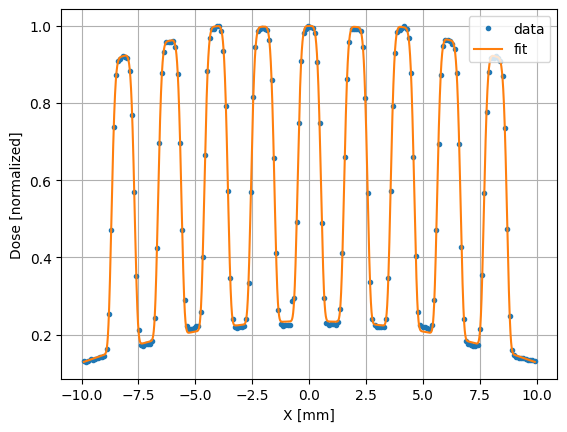

In [ ]:
nf = int(99)
fl = int(380)
pace = int(10)

x_min = - nf*0.1
x_max = + nf*0.1

x_fit = np.linspace(x_min,x_max,2*nf)
pvdr_fit_multi = []
p_dose_fit_multi = []
p_valley_fit_multi = []

params = []

for i in range(9):
    params.append(1)
    params.append(-8 + 2*i)
    params.append(0.5)
params.append(0)
params.append(0)
params.append(1.5)

fit_params = []

for i in range(0,fl,pace):
    data = dose[:,i]
    y_fit = data[100-nf:100+nf]
    p_fit, p_cov = curve_fit(multi_gauss_9_higher, x_fit, y_fit/np.max(y_fit), p0=params , maxfev = 200000)
    params = p_fit
    fit_params.append(p_fit)
    x_cont = np.linspace(x_min,x_max,20000)
    fit = multi_gauss_9_higher(x_cont, *p_fit)
    p_dose_fit_multi.append(max(fit))
    p_valley_fit_multi.append(min(fit))
    pvdr_fit_multi.append(np.max(fit[7500:12500])/np.min(fit[7500:12500]))
    if i == 0:
        fit1 = fit
        data1 = y_fit
        plt.plot(x_fit, y_fit/np.max(y_fit),'.', label = 'data')
        plt.plot(x_cont, fit/np.max(fit), label='fit')
        #plt.xlim(-2.5,2.5)

    # if i < 10:
    #     plt.plot(x_fit, y_fit,'.k')
    #     #plt.plot(x_cont, fit, 'k',label='fit')
    #     #plt.xlim(-2.5,2.5)
plt.grid()
plt.legend(loc= 'upper right')
plt.xlabel("X [mm]")
plt.ylabel("Dose [normalized]")
plt.savefig("images/dose_fit_multi_9_higher.png")
plt.show()

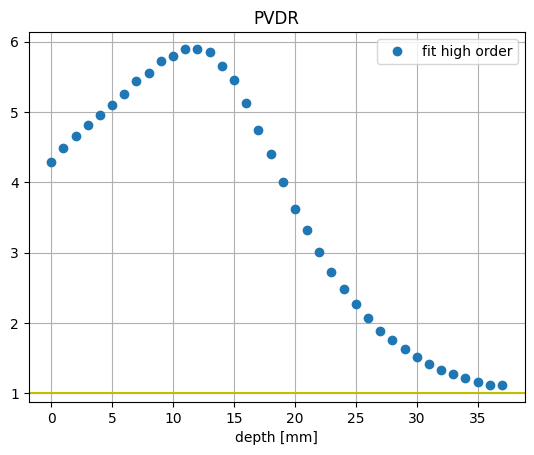

1.1189337123755405


In [ ]:
z_pvdr = np.linspace(0,(len(pvdr_fit_multi)*pace-pace)/500 * 50, len(pvdr_fit_multi))
z2 = [0.0, 1.0416666666666667, 2.0833333333333335, 3.125, 4.166666666666667, 5.208333333333334, 6.25, 7.291666666666667, 8.333333333333334, 9.375, 10.416666666666668, 11.458333333333334, 12.5, 13.541666666666668, 14.583333333333334, 15.625000000000002, 16.666666666666668, 17.708333333333336, 18.75, 19.791666666666668, 20.833333333333336, 21.875, 22.916666666666668, 23.958333333333336, 25.0]
pvdr2 = [7.782500404476443, 7.611691080553325, 7.4732728108016975, 7.325579228872817, 7.1572001249969235, 6.941803858727679, 6.699047300239946, 6.476476073218022, 6.17106856794426, 5.8567044894132065, 5.515213450138911, 5.135001736689914, 4.742468117830488, 4.3680398720035365, 3.965567343758926, 3.615594443305621, 3.2352881049970272, 2.9242486956926914, 2.6308712326814603, 2.3380882435097234, 2.1283495828701766, 1.9271071731705554, 1.7426605171820817, 1.6350033216895048, 1.6203291204023935]

plt.plot(z_pvdr,pvdr_fit_multi,'o', label = 'fit high order')
# plt.plot(z2,pvdr2,'o', color = 'tab:orange', label = 'fit')
plt.grid()
plt.title('PVDR')
plt.axhline(1,color = 'y')
# plt.ylabel('PVDR')
plt.xlabel('depth [mm]')
plt.legend()
plt.savefig('images/pvdr_multi_9_higher_conf.png')
# plt.xlim(-2,200)
# plt.ylim(-1,5)
plt.show()
print(min(pvdr_fit_multi))

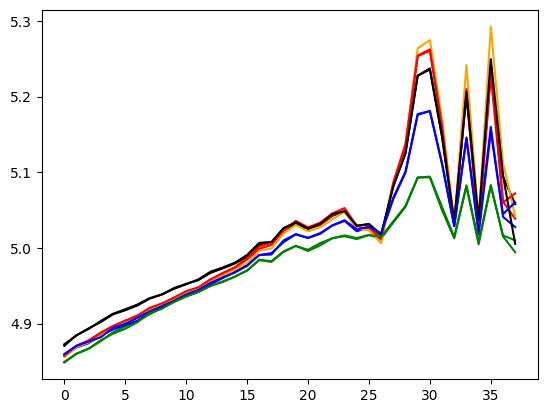

In [ ]:
fit_params = np.array(fit_params)

offset = fit_params[:,19]
lim = int(53)

plt.plot(fit_params[:lim,0]+offset[:lim],'g')
plt.plot(fit_params[:lim,3]+offset[:lim],'b')
plt.plot(fit_params[:lim,6]+offset[:lim],'k')
plt.plot(fit_params[:lim,9]+offset[:lim],'r')
plt.plot(fit_params[:lim,12]+offset[:lim],'orange')
plt.plot(fit_params[:lim,15]+offset[:lim],'r')
plt.plot(fit_params[:lim,18]+offset[:lim],'k')
plt.plot(fit_params[:lim,21]+offset[:lim],'b')
plt.plot(fit_params[:lim,24]+offset[:lim],'g')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

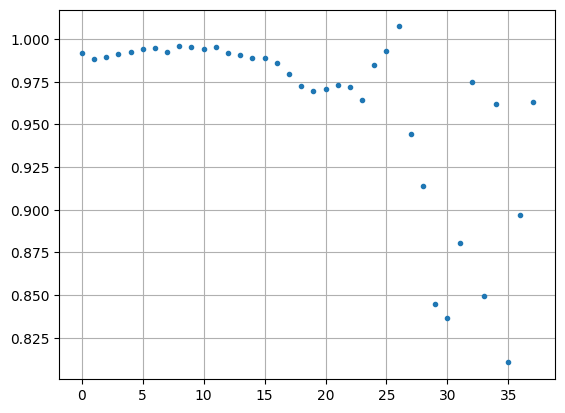

In [ ]:
lateral = fit_params[:,0]/fit_params[:,12]
plt.plot(lateral[:45], '.')
plt.grid()
plt.show

In [ ]:
np.shape(fit_params)

(38, 30)